# STAT 201 Group Project 
___
___

**Group Member**
- Andres Zepeda Perez
- Lingjun(Stella) Wang
- Anthony Obrzut
- Dung (Edison) Le


## Introduction
___

>Video games are growing in popularity and in order to get an edge in sales, video game studios have tried several different forms of innovation. Two such examples of these innovations are genre-mixing (from both similar and different genres) and new types of genres entirely. Despite this rise of new gaming genres, the Strait Research and MasterClass article both suggest that Action genre is the most popular gaming genre currently. This leads us to ask the question:  
>
>> #### ***Are Action games still more popular than new innovative genres (Misc) in recent years (2012-2016)?***
>
>To answer this question, we will test if there is a difference between median sales of two genres of video games, specifically Action and Misc.
>
>The dataset, downloaded from https://www.kaggle.com/gregorut/videogamesales, includes a list of video games with sales greater than 10,000 copies sold (generated by a scrape of vgchartz.com, the kaggle dataset has a typo claiming 100,000). This dataset will be used to perform hypothesis test regarding sales between two genres. The data frame's fields are Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales. 
>
>The response variable in this question is 'sales' (specifically global sales), which pertains to the number of copies sold, and the explanatory variable is genre. We will use difference of medians to answer this question since we are interested in the popularity of two genres of video games, not their lucre. The standard deviation is also important to look at since there can be large variance in the sales data and the third quantile to somewhat get a sense of each genre's potential popularity.
>




## Preliminary Results
___

In [27]:
#import library
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(tidyverse)
library(dplyr)


## Preliminary Results: Part I

---
> The purpose of the preliminary results portion of this proposal is to explore our dataset. 
> We will conduct data analysis and visualizations in order to observe any possible trends in the data that could inform our question. 
>
> **In this section we will carry out the following steps:** 
>
>
> **Step 1:** Analyze the raw data. 
>
> **Step 2:** Conduct a statistics summary.
>
> **Step 3:** Create initial data visualizations.
>

### Step 1: Analyze the Raw Data

___

> First we will load our data into R using **read_csv**

In [13]:
game_sales <- read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
head(game_sales)
tail(game_sales)

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)



Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0,0,0.01
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0,0,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0,0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0,0,0.01
16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0,0,0.01
16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0,0,0.01


> We can see from loading out data, we find there are some missing data in the dataset.
>
> We will further explore the data set by looking at the number of columns and then number of rows:

In [14]:
nrow(game_sales)

[1] 16598

In [15]:
ncol(game_sales)

[1] 11

> We can see in our raw data, the number of rows is 16598, and the number of columns is 11.
>
>
> Next, we want to take a look at the count of each genre.

In [16]:
group_sale <- game_sales%>%
    group_by(Genre) %>%
    count() %>%
    arrange(-n)
group_sale

Genre,n
<chr>,<int>
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


> As we want to analyze the current popularity of Action games, we have to filter the data by a certain range of years. The range chosen was 5 years to allow for games to mature/stabilize in sales as Misc is not dated as far back as Action genre. (The dataset came out in 2017 so a complete 5 year range would be from 2012-2016)

> The response column we are interested is Global_Sales, so we will multiply global sales by 10, making it be a scale of 100k games instead of 1M.

In [17]:
min_year = 2012
max_year = 2016

game_global_sales <- game_sales %>%
    mutate(Year = as.integer(Year)) %>%
    filter(!is.na(Year))

game_global_sales <- game_global_sales %>%
    filter(min_year <= Year & Year <= max_year) %>%
    filter(Genre %in% c("Action", "Misc")) %>%
    mutate(Global_Sales = Global_Sales * 10) %>%
    select(Genre, Global_Sales) 

head(game_global_sales)

Warning message:
“Problem with `mutate()` input `Year`.
ℹ NAs introduced by coercion
ℹ Input `Year` is `as.integer(Year)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Genre,Global_Sales
<chr>,<dbl>
Action,214.0
Action,163.8
Action,119.8
Misc,92.0
Action,82.4
Misc,69.1


> We can see from loading out data, that it is already in tidy format. 
> We will further explore the data set by looking at the number of columns and then number of rows:

In [18]:
nrow(game_global_sales)

[1] 1152


>
> Before any statistical wrangling and inference can be done, we need to check for any missing data

In [19]:
missing <- sum(is.na(game_global_sales))
missing

[1] 0

> As there is no missing data for the rows and colums we are interested in, we don't need to drop anything


In [24]:
 action_sales <- game_global_sales%>%
      filter(Genre == "Action") 
action_summary <- summary(action_sales)
action_summary

action_sales_sd <- sd(action_sales$Global_Sales)
action_sales_sd


    Genre            Global_Sales    
 Length:974         Min.   :  0.100  
 Class :character   1st Qu.:  0.400  
 Mode  :character   Median :  1.300  
                    Mean   :  4.486  
                    3rd Qu.:  4.275  
                    Max.   :214.000  

[1] 11.96104

> From the summary above, we can see that the mean of global sales of Action is 449k, while the median of global sales of Action is 130k, and standard deviation of global sales of Action is 1.2M. The standard deviation being so high and the median being much lower than the mean implies that the data could be heavily skewed to the right.

In [28]:
misc_sales <- game_global_sales%>%
      filter(Genre == "Misc") 

misc_summary <- summary(misc_sales)
misc_summary


misc_sales_sd <- sd(misc_sales$Global_Sales)
misc_sales_sd

    Genre            Global_Sales   
 Length:178         Min.   : 0.100  
 Class :character   1st Qu.: 0.400  
 Mode  :character   Median : 1.450  
                    Mean   : 4.781  
                    3rd Qu.: 3.900  
                    Max.   :92.000  

[1] 11.27469

> From the summary above, we can see that the mean of global sales of Misc is 478k, the median of global sales of Misc is 145k, and the standard deviation of global sales of Misc is 1.1M, with a large standard deviation in comparison to the mean and median once again (the sales minimum is 10k).
>
>>The maximum of global sales of Action is 21.4M, the maximum of global sales of Misc is 9.20M, and both have very large outliers and ranges. Since the global sales of Misc and Action have large differences between their respective means and medians, with the mean being much larger than the median in both groups, we will use the median to analyze the popularities of these two categories because the median is less sensitive to extreme data than the mean.

### Step 3: Create Initial Data Visualizations
___
>We will take a look at each distribution of global sales of Action and Misc using histograms with the median values of each group represented by a vertical red line. 

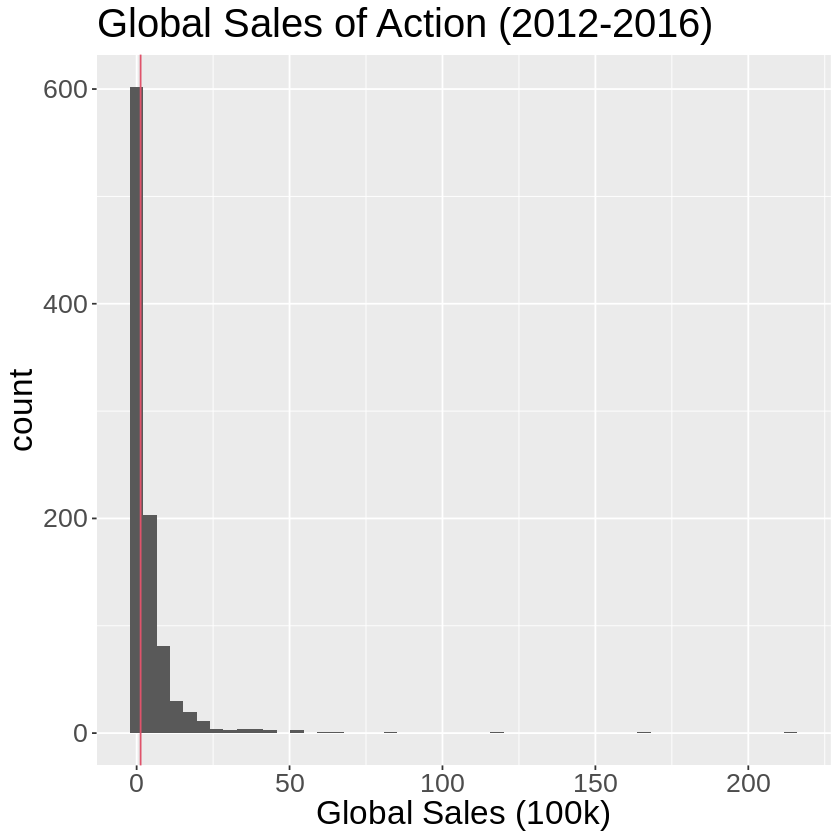

In [11]:
median_action <- action_sales %>%
      summarize(median = median (Global_Sales))

action_global_sales_dist <- action_sales%>%
      ggplot()+
      geom_histogram(aes(x= Global_Sales), bins = 50) +
      geom_vline(xintercept = median_action$median,col=2) +
      labs(x = "Global Sales (100k)", title = "Global Sales of Action (2012-2016)") +
      theme(text = element_text(size = 20))

action_global_sales_dist

> The above plot is the distribution of global sales of Action. As we can see, the distribution is right-skewed and unimodal as expected from the differences between the means and medians within both groups. There also appears to be a few outliers. 

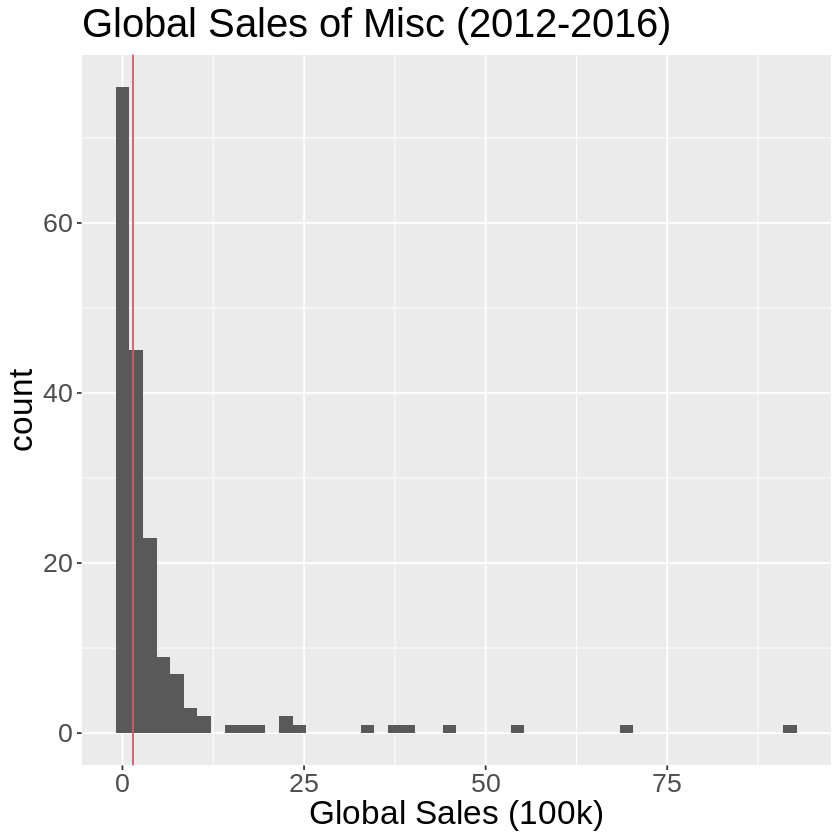

In [12]:
median_misc <- misc_sales%>%
      summarize(median = median(Global_Sales))

misc_global_sales_dist <- misc_sales %>%
      ggplot()+
      geom_histogram(aes(x= Global_Sales), bins = 50)+
      geom_vline(xintercept = median_misc$median,col=2) +
      labs(x = "Global Sales (100k)", title = "Global Sales of Misc (2012-2016)")+
      theme(text = element_text(size = 20))

misc_global_sales_dist

> The above plot is the distribution of global sales of Misc. As we can see, the distribution is right-skewed and unimodal with outliers again.

> The plots having a different x-axis scale can make it hard to compare so we will facetwrap them to make it easier.

`summarise()` ungrouping output (override with `.groups` argument)



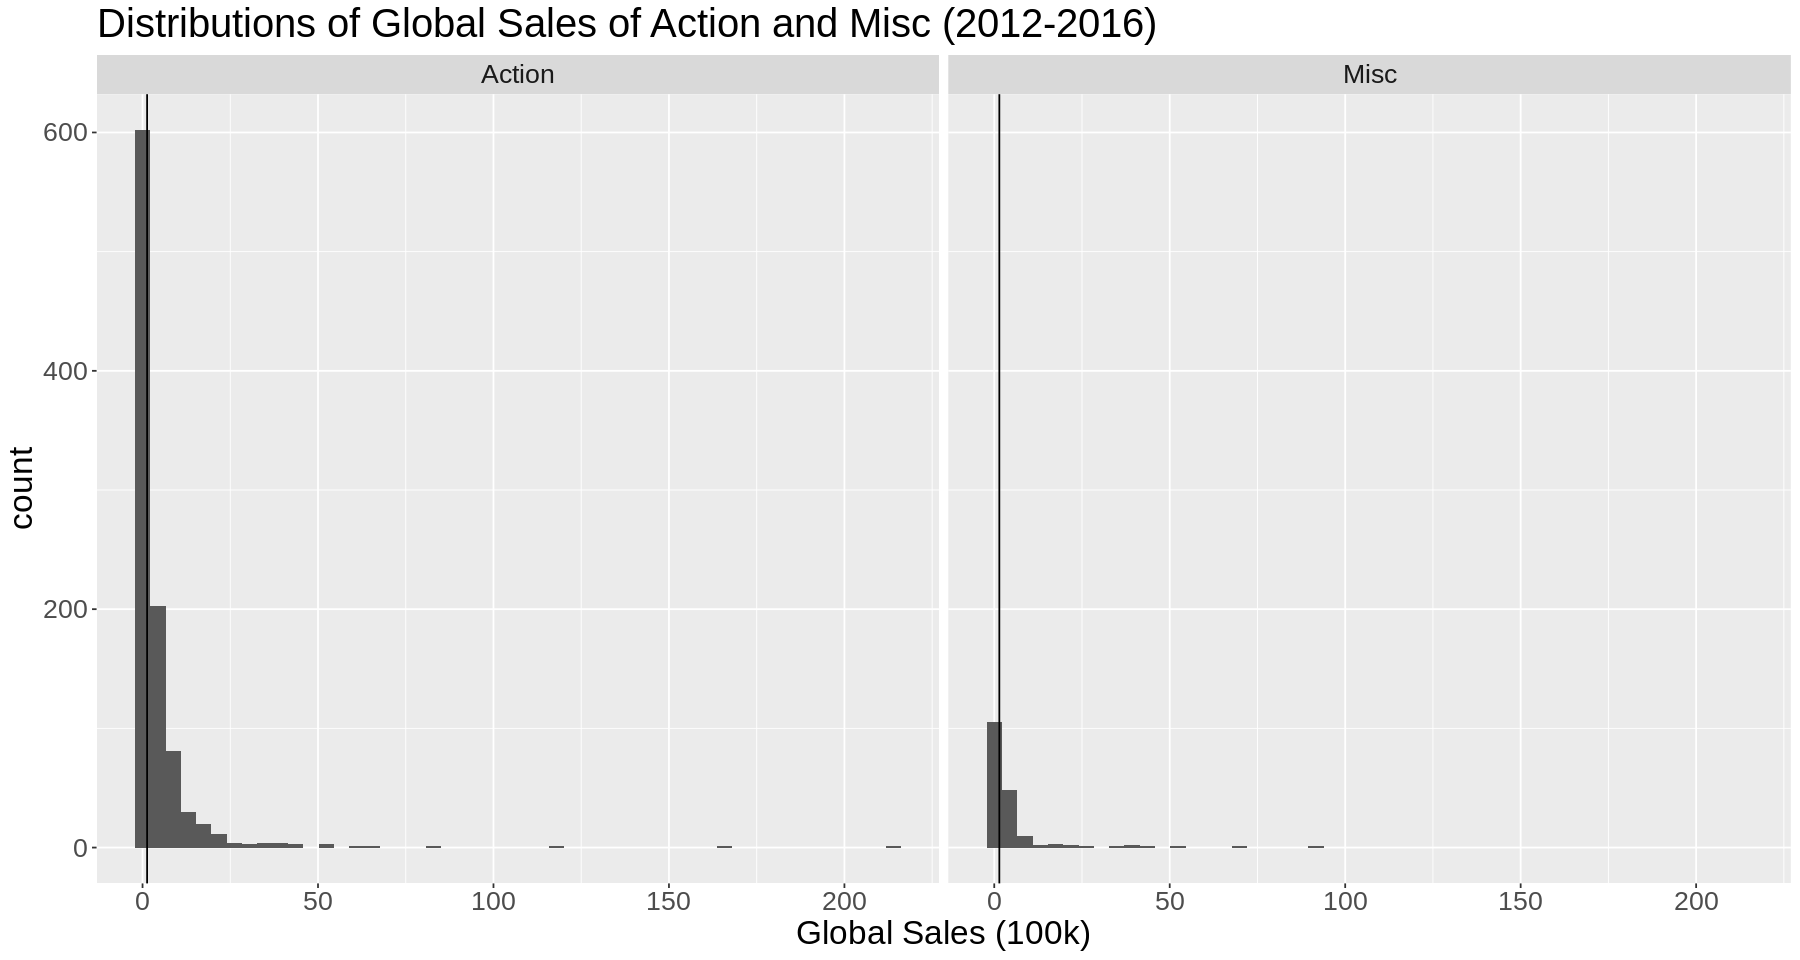

In [13]:
options(repr.plot.width=15, repr.plot.height=8)
medians <- game_global_sales %>%
     group_by(Genre) %>%
     summarise(median = median(Global_Sales))


global_sales_distribution <- game_global_sales %>%
     ggplot()+
     geom_histogram(aes(x= Global_Sales), bins = 50) +
     geom_vline(data = medians, mapping = aes(xintercept= median))+
     facet_wrap(~Genre) +
     labs(x = "Global Sales (100k)", title = "Distributions of Global Sales of Action and Misc (2012-2016)") +
     theme(text = element_text(size = 20))


global_sales_distribution

> So it seems that the data looks similar in shape, with Misc having a large outlier. However, side-by-side boxplots may make it easier to see differences and similarities in the the distributions of the two groups.

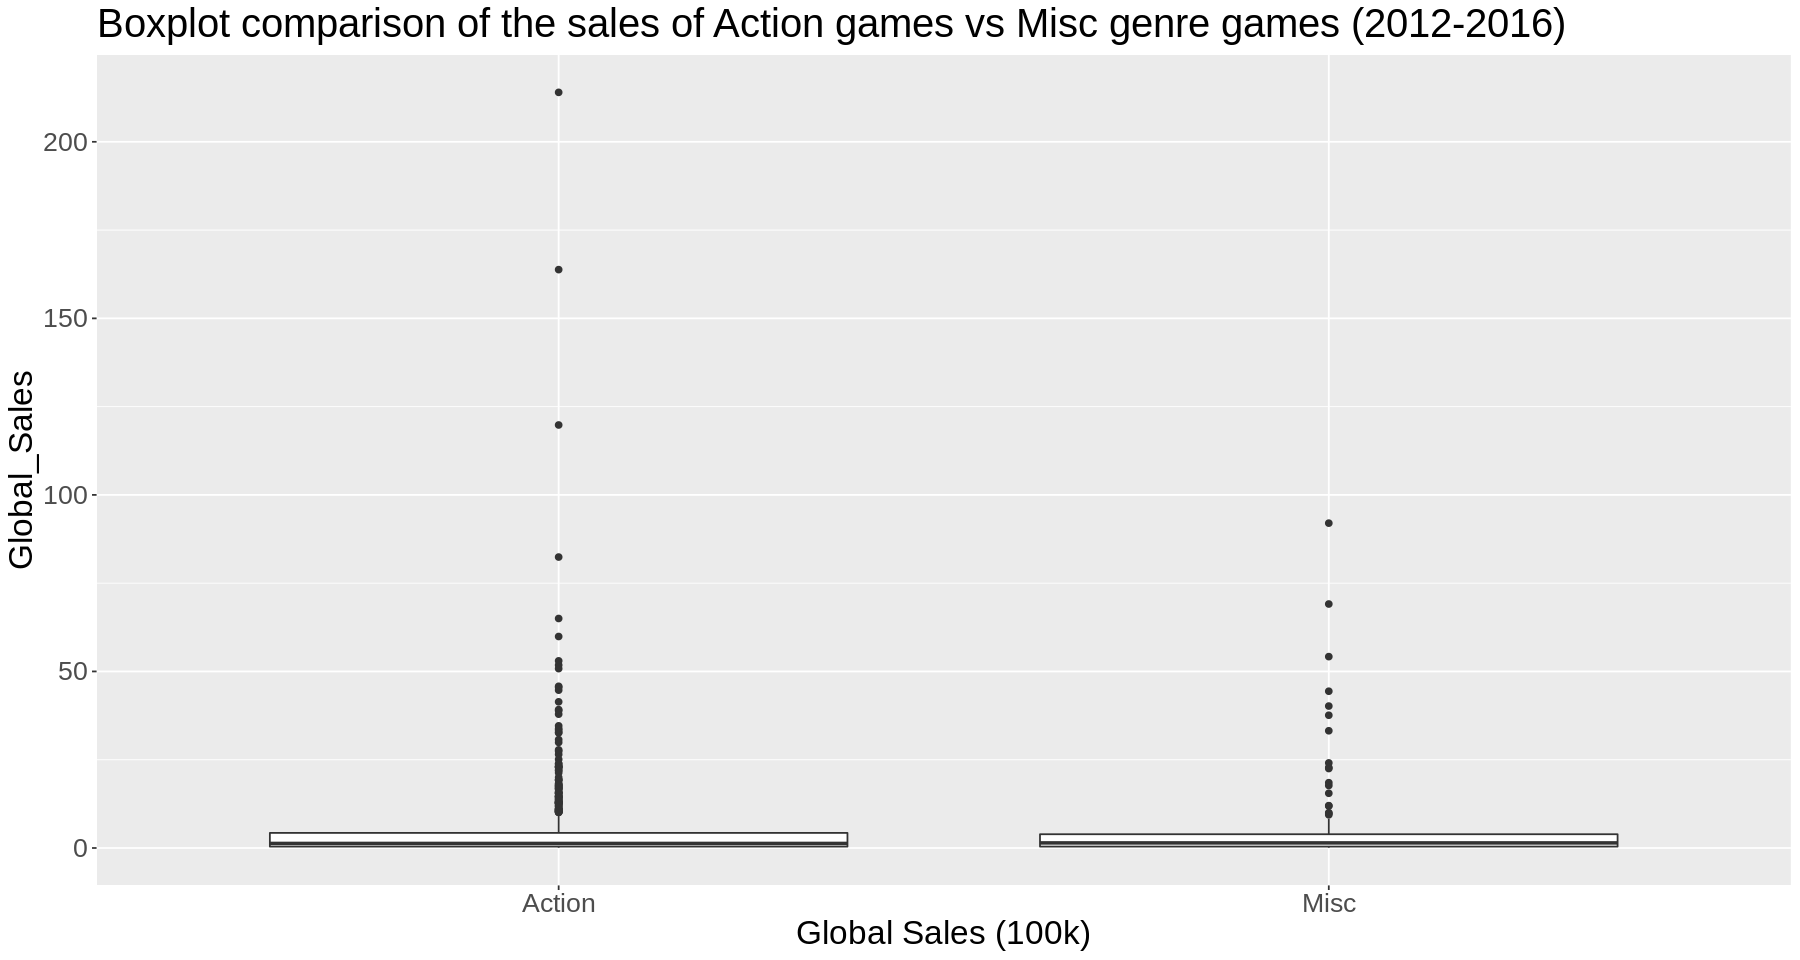

In [14]:
box_plot <- game_global_sales %>%
      ggplot(aes(x = Genre, y = Global_Sales)) +
      geom_boxplot()+
      labs(x = "Global Sales (100k)", title = "Boxplot comparison of the sales of Action games vs Misc genre games (2012-2016)")+
      theme(text = element_text(size = 20))

box_plot

> There are so many outliers that the data can be hard to visualize and compare well (over 95% of the boxplot is data outside the 75% range). So we'll cut them off to make the 25%-75% range more visible.

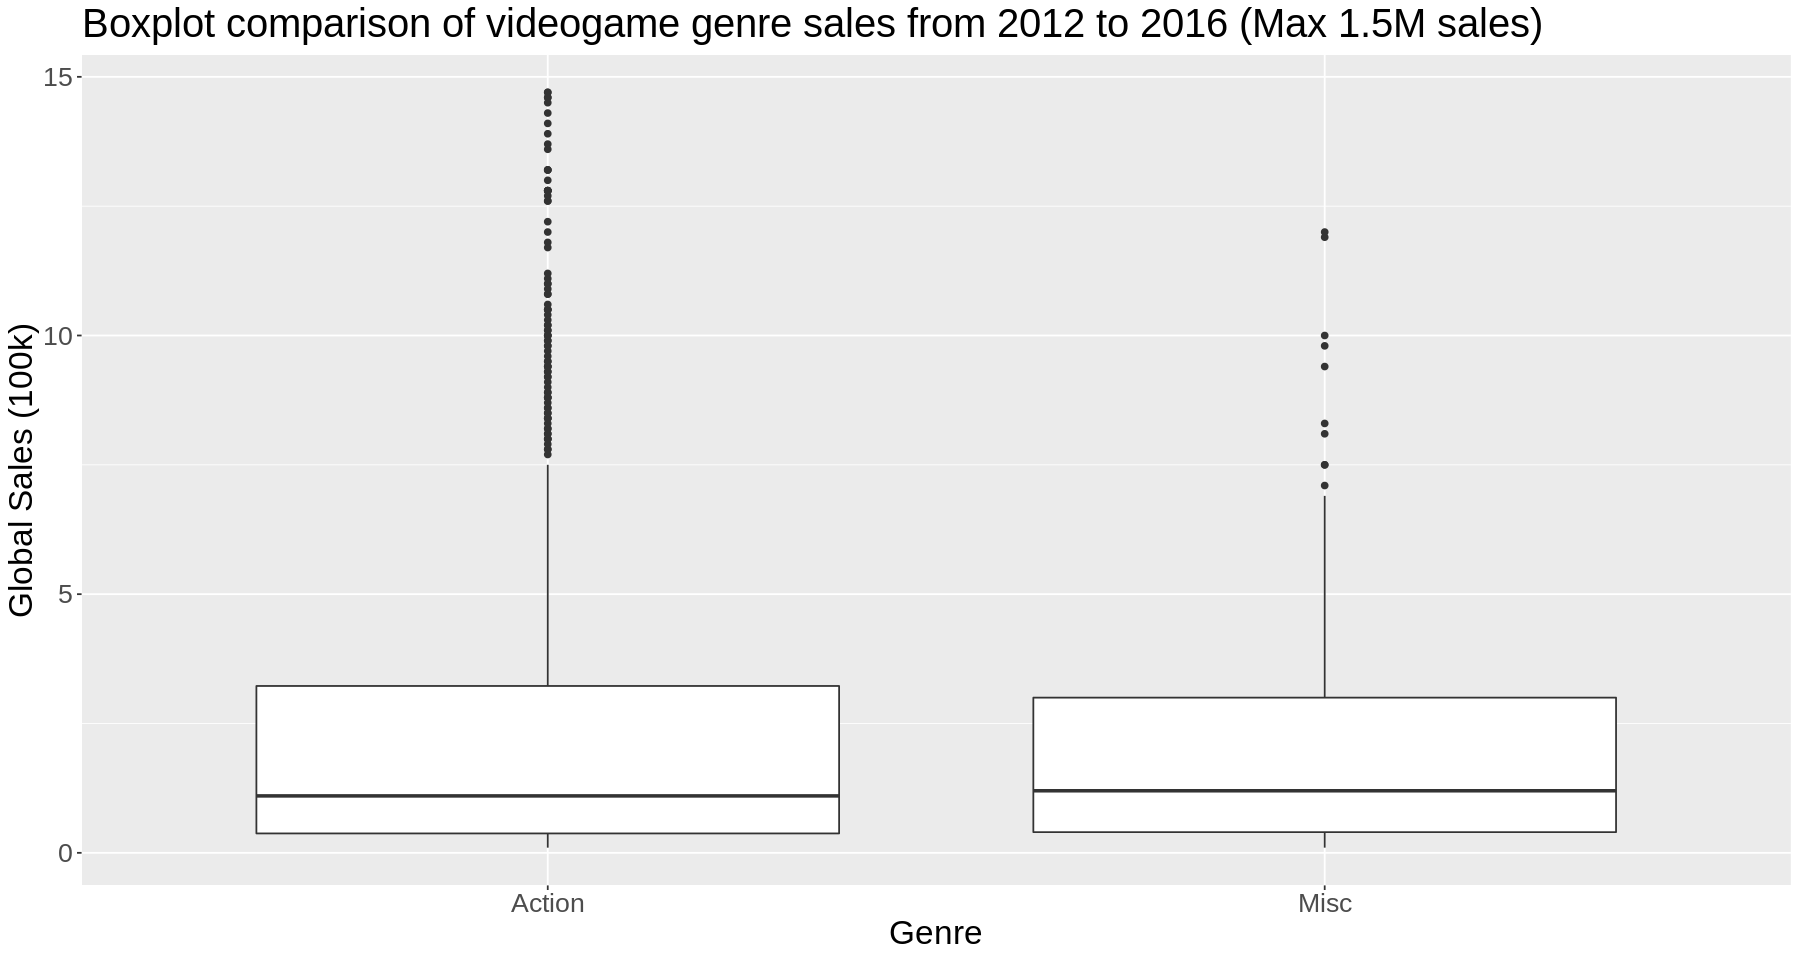

In [15]:
box_plot <- game_global_sales %>%
      filter(Global_Sales < 15) %>% #1 is 100k, 10 is 1M, 15 is 1.5
      ggplot(aes(x = Genre, y = Global_Sales)) +
      geom_boxplot()+
      labs(x = "Genre", y = "Global Sales (100k)", title = "Boxplot comparison of videogame genre sales from 2012 to 2016 (Max 1.5M sales)")+
      theme(text = element_text(size = 20))

box_plot

> #### **Premilinary Analysis:**
>
>
> Even with the zoomed in version, it is hard to tell which is genre is more popular based on their statistics. Misc genre has a higher median than that of Action, 145k > 130k respectively. On the other hand, Action genre has a higher third quantile than that of Misc genre, 428k > 390k respectively. Moreover, we do not have enough evidence to draw a conclusion from this alone, since we only have access to a sample of the entire video game global sales population. Hence, we will use hypothesis testing with alpha level of 0.05 and a 95% confidence interval via simulation/randomization so that we will have enough evidence to make a conclusion. 
>
>
>Here we include a summary for the analysis on the next part.

In [16]:
estimates <- game_global_sales%>%
      group_by(Genre) %>%
      summarize(median = median(Global_Sales), sd = sd(Global_Sales), var = var(Global_Sales), n = n())
estimates 

`summarise()` ungrouping output (override with `.groups` argument)



Genre,median,sd,var,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Action,1.30,11.96104,143.0666,974
Misc,1.45,11.27469,127.1186,178


## Methods: Plan
___

>This report is trustworthy as we use data from a reliable source to perform analysis. Moreover, we will later carry out a  hypothesis test with a significance level of 0.05 and a 95% confidence interval via simulation/randomization to provide valid statistical evidence for our conclusion. 
>
>Simply comparing medians, standard deviations and a high quantile of sales of the two genres would not be enough to draw a conclusion as this dataset is only a sample of the entire population of games. 
>
>As our question is about popularity, it makes sense to perform a hypothesis test where we assume there is no difference in median sales of the two genres for the null hypothesis and test it against the alternate hypothesis which is the median sales of Action is higher than that of Misc. We also use bootstrap to generate more samples and calculate 95% CI for difference in median sales of the two genres to see if 0 (the null hypothesis) is captured in the interval to further solidify our conclusion.
>
>
>
>
> #### **Hypothesis testing:**
>
>Our null hypothesis is median of global sales of Action is equal to the median of global sales of Misc 
>>(Med Sales (Action) = Med Sales (Misc))

>The alternative hypothesis is median of global sales of Action is larger than the median of global sales of Misc 
>>(Med Sales (Action) > Med Sales (Misc))
>
>


> First, we calculate the median difference of global sales between Action and of Misc.
> We will use the median of global sales of Action minus the median of global sales of Misc.

In [11]:
set.seed(123) # randomly chosen seed for consistency in results written in markdown cells

obs_diff_in_medians  <- game_global_sales %>%
    specify(formula = Global_Sales ~ Genre) %>%
    calculate(stat = "diff in medians", order = c("Action","Misc"))
obs_diff_in_medians

stat
<dbl>
-0.15


> We will now perform shuffles/permutations to test the hypothesis 

> Simulating from the null distrition to generate 1000 samples.

In [18]:
null_diff_global_sales_action_misc <- 
   game_global_sales %>% 
   specify(formula = Global_Sales ~ Genre)%>%
   hypothesise(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat="diff in medians", order = c("Action","Misc"))


head(null_diff_global_sales_action_misc)

replicate,stat
<int>,<dbl>
1,-0.45
2,-0.60
3,-0.10
4,0.10
5,-0.30
6,0.00


> We plot the result of the hypothesis test with visualize with 10 bins, and put a vertical bar for the observed test statistic obs_diff, and shade the tail(s).

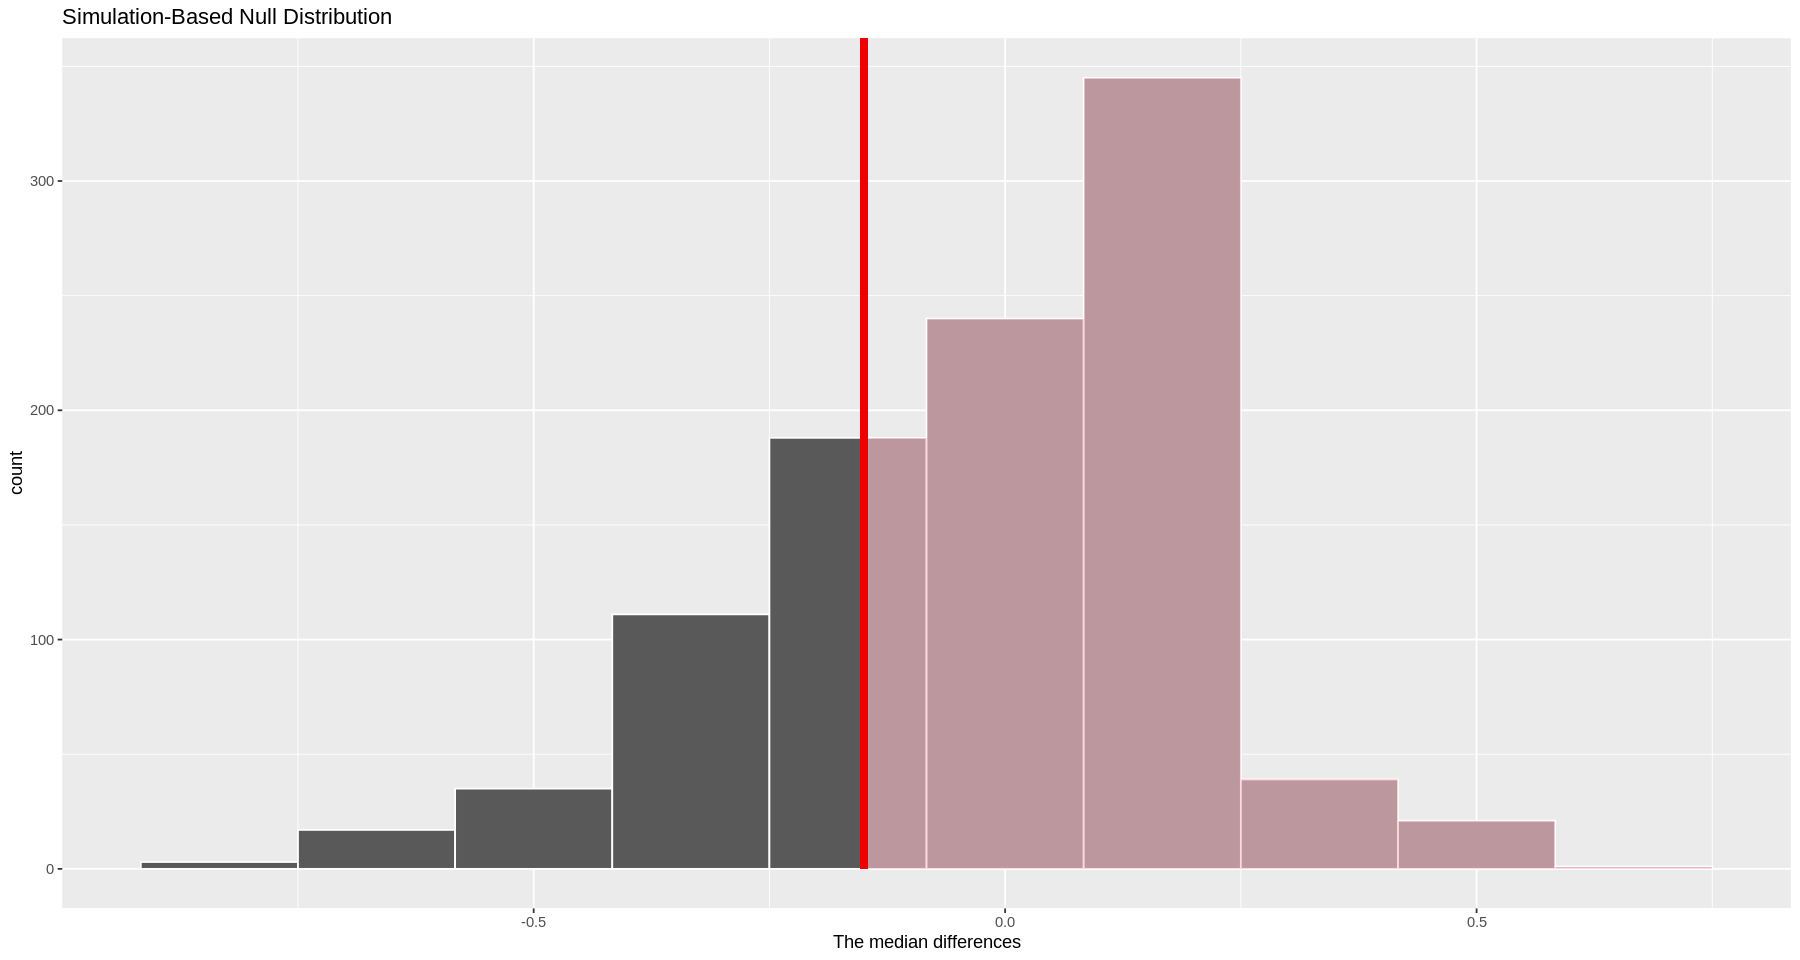

In [19]:
diff_in_medians_plot <- null_diff_global_sales_action_misc %>%
   visualize(bins = 10) + 
   shade_p_value(obs_diff_in_medians, direction = "right")+
   xlab("The median differences")

diff_in_medians_plot

> We obtain the p-value of obs_diff_in_medians from null_diff_global_sales_action_misc.

In [20]:
get_p_value<- null_diff_global_sales_action_misc %>% 
    get_p_value(obs_stat = obs_diff_in_medians, direction = "right")

get_p_value

p_value
<dbl>
0.805


> Since the p-value is larger than the alpha level of 0.05, we now have statistical evidence to accept the null hypothesis. 
> We always want to be sure and look at data from multiple angles. Therefore, we will find 95% confidence interval for the difference in median via boostrap. 

In [25]:
diff_in_medians_bootstrap_dist <- game_global_sales %>% 
   specify(formula = Global_Sales ~ Genre)%>%
   generate(reps = 1000, type = "bootstrap") %>% 
   calculate(stat="diff in medians", order = c("Action","Misc"))

head(diff_in_medians_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-0.1
2,0.4
3,0.0
4,-0.3
5,0.1
6,-0.2


In [26]:
diff_in_medians_ci <- diff_in_medians_bootstrap_dist%>%
                    get_confidence_interval(level = 0.95, type = "percentile")

diff_in_medians_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.7,0.3



> 95% CI for the difference in median of sales of Action and Misc genre is (-0.7, 0.3). We can see that 0 is captured in the CI, which further solidifies our decision to accept the null hypothesis and states that the median of global sales of Action is the same than the median of global sales of Misc at a 5% significance level, or in other words, that Action is not more popular than new genres in recent years. 
>
>
> Also we can visualize the confidence interval diff_in_medians_ci with the bootstrap distribution diff_in_medians_bootstrap_dist.

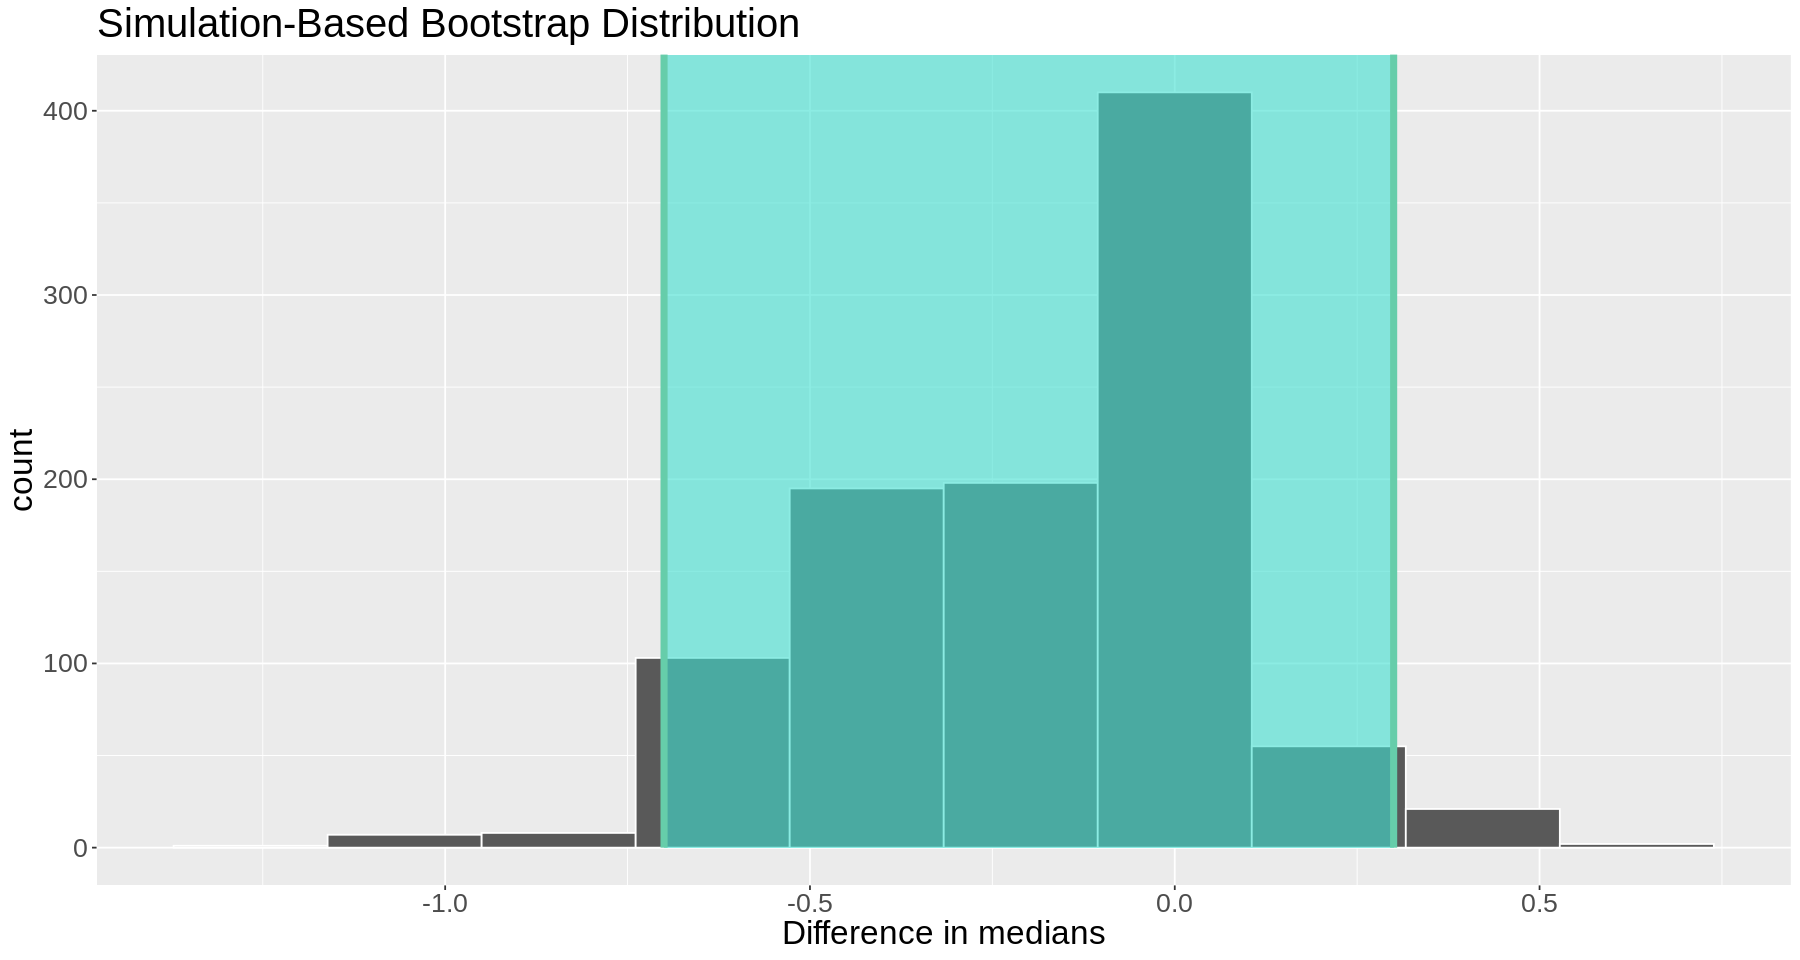

In [23]:
diff_in_medians_ci_plot <- diff_in_medians_bootstrap_dist%>%
            visualize(bins = 10)+
            shade_confidence_interval(endpoints = diff_in_medians_ci)+
            xlab("Difference in medians") +
            theme(text = element_text(size = 20))


diff_in_medians_ci_plot

## Conclusion
___
>
>We expect to find that the Action genre is not a more popular genre of games compared to new innovative genres.

>After performing the hypothesis test at 0.05 significance level and obtaining a p-value of 0.805, together with a 95% CI for difference in median sales of the two genres that captures 0 (null hypothesis), we have statiscal evidence that global sales of the Action genre are not higher than those of the "Misc" genre from 2012-2016. Therefore, we conclude that Action genre is not more popular than the new innovating genres game studios have been pushing. 
>
>
> 
>
> **Future questions and impact:**
>
>These findings could reference or be evidence for future research regarding if gamers from a certain demographics prefer Action genres to other genres or in questions regarding different years intervals (possibly up to 2020). Moreover, this findings can also give games company a better idea of how well Misc genre are doing (at least up until 2016) compared to a popular genre such as Action. This way they can come up with ideas/paths/strategies for their next game products. 

>Other future questions can be asking about whether any genre is truly is the most popular overall or who is buying the "Misc" games. Moreover, researchers could look into what specific factors of Misc genre that make it stand out in recent years.
>
>
>



## Scientific publications
___

> https://straitsresearch.com/blog/top-10-most-popular-gaming-genres-in-2020/
>
>
> https://www.masterclass.com/articles/guide-to-video-game-genres#10-popular-video-game-genres